<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/percentage_top_authors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we'll discover the percentage of publications by the most popular authors.
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
- unicodedata

</font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re
import unicodedata

<br>
<font size="3"> 
    
After installing and importing everything we need, we will write the functions that we will use in this project.
    
- **most_popular_authors(x):** gets as input a dictionary with all authors and returns the top 10 most popular ones.
- **plot_barchart(x,y):** gets as input two lists and creates the chart.
</font>
<br>

In [ ]:
#function to return a list with the 10 most popular authors
def most_popular_authors(mydict):
    count = []
    top_authors = []

    for w in sorted(mydict, key=mydict.get, reverse=True):
        top_authors.append(w)
        count.append(mydict[w])
 
    return (top_authors[0:9],count[0:9])

#function to print output from two lists
def plot_barchart(source,count):
    plt.figure(figsize=(20, 5))
    plt.bar(source, count)
    plt.title('Percentage of publications of the 100 most popular authors')
    plt.grid(axis='y')
    plt.show() 

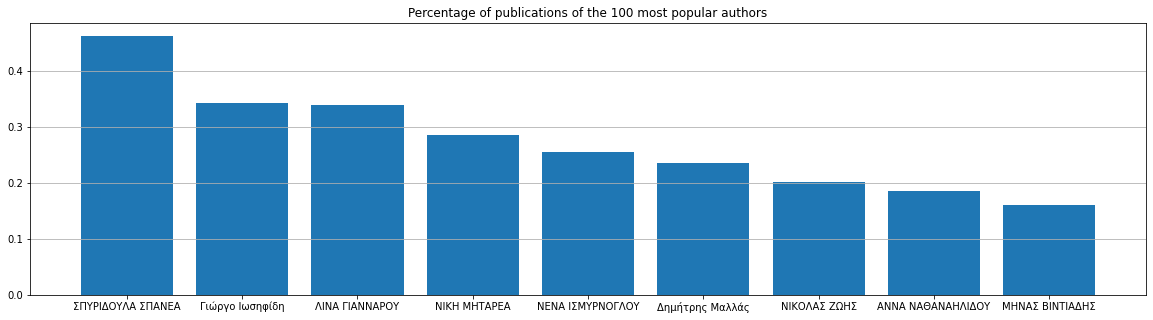

In [ ]:
#read the data
df = pd.read_csv('output.csv')

#fill all null values in the table
df = df.fillna(" ")

#get all the authors
authors = list(df['author'])


#we want to find the personal authors not the ones with the sites signature
unique_authors = set(authors)

#create an dictionary with all the authors
authors_dict = {k:0 for k in unique_authors}

#delete the authors that aren't signed by one person
del authors_dict['newsit.gr']
del authors_dict['in.gr']
del authors_dict[' Sport24']
del authors_dict['lifo.gr']
del authors_dict['newpost.gr']
del authors_dict['naftemporiki.gr']
del authors_dict['kathimerini.gr']
del authors_dict['LIFOTEAM']
del authors_dict['periodista.gr']
del authors_dict['Newsroom']
del authors_dict['iefimerida.gr']
del authors_dict[' ΕΦ.ΣΥΝ. ']
del authors_dict['ΤΟ ΠΟΝΤΙΚΙ WEB']
del authors_dict['NEWSROOM']
del authors_dict['tovima.gr']
del authors_dict[' Sport24.gr']
del authors_dict['THE LIFO TEAM']
del authors_dict[' ΕΦ.ΣΥΝ ']
del authors_dict[' sport24 radio']
del authors_dict['protagon import']
del authors_dict[' EΦ.ΣΥΝ. ']
del authors_dict['-']
del authors_dict['tanea.gr']
del authors_dict['popaganda.gr']
del authors_dict['efsyn.gr']
del authors_dict['Protagon Team']
del authors_dict[' in.gr Team ']
del authors_dict['reader.gr']
del authors_dict['topontiki.gr']
del authors_dict[' efsyn.gr ']
del authors_dict['THETOC TEAM']
del authors_dict['Sportscast r']
del authors_dict['Gazzetta team']


#count the number of articles each author has published
for x in authors_dict:
    count = authors.count(x)
    authors_dict.update({x:count})

#get the top 10 most popular authors
top = most_popular_authors(authors_dict)
top_authors = top[0]
number_of_articles = top[1]

#get the number of all available articles in order to find the presentage
total_articles = len(df.index) + 1 

# percentage = (i * 100)/total_number_of_available_articles
index = 0
for i in number_of_articles:
    number_of_articles[index] = (i * 100)/ total_articles
    index += 1

#print(number_of_articles)
plot_barchart(top_authors,number_of_articles)